# Tellende prosjekt i ISTx1003 - 2020

I prosjektdelen av ISTx1003 Statistikk, Statistisk læring og data science, har vi fokus på tre hovedtemaer: 
regresjon, klassifikasjon og klyngeanalyse. 

Dette er oppgaveteksten til den tellende prosjektoppgaven, der besvarelsen teller 20% av karakteren i emnet.  

Veiledning av prosjektoppgaven annonseres separat for hver campus i Blackboard.

Oppgaven utføres i grupper, med anbefalt gruppestørrelse 2-4 personer. Det er opprettet gruppesett under "Prosjektoppgaven" på Blackboard, der dere melder dere på. 

Direktelenke til Prosjektmodulen i Blackboard (husk først å logge inn på Blackboard og at dere må ha meldt dere på modulen): https://s.ntnu.no/ist1003

Det er totalt 20 spørsmålspunkter som skal besvares, og hvert spørsmålspunkt gir maksimalt ett poeng. Alle spørsmålene er skrevet inn i en tekstfil som skal brukes som mal for det som skal leveres inn. Tekstfilen ligger her: https://www.math.ntnu.no/emner/IST100x/ISTx1003/Prosjekt1003Qs.txt
(Det er to grunner til å bruke denne malen: det letter samskriving og det letter karaktersetting.)

Oppgaven skal utføres i Python, ved hjelp av Jupyter-notatbok-versjonen av denne filen som du nå leser. Notatboken er lastet opp på Jupyterhubben, men kan også finnes her: https://www.math.ntnu.no/emner/IST100x/ISTx1003/Prosjekt1003.ipynb
og vil du bare lese notatboken så finnes den som html: https://www.math.ntnu.no/emner/IST100x/ISTx1003/Prosjekt1003.html

Det er meningen at dere skal kjøre notatboken på Jupyterhubben vår https://s.ntnu.no/isthub, eller på deres egen installasjon.

Innlevering av prosjektet skal skje som en innlevering på Blackboard, og kun en i hver gruppe leverer.

**Følgende skal leveres inn (lastes opp på Blackboard):**

* Svarene på spørsmålene som dere har skrevet inn i spørsmålsmalen og laget om til en pdf-fil (for eksempel om dere har gjor om malen til en word-fil og så lagret den som pdf).
* Denne Jupyter-notatboken, der de endringene dere har gjort i koden er med.

**Frist for innlevering av prosjektet er søndag 29.november kl 23.59.**

# Oppgave 1: Regresjon

Oppgave 1 har 8 spørsmålspunkter merket Q1.1-Q1.8, som skal besvares.

**Oppgaven inneholder følgende elementer:**

* Laste inn og utforske et datasett
* Tilpasse en enkel lineær regresjonsmodell og diskutere denne
* Tilpasse en multippel lineær regresjonsmodell og diskutere denne

## Antall røde blodceller

Vi skal studere antallet røde blodceller (per liter blod) til ulike idrettsutøvere. 
Målet er å undersøke hvordan antallet røde blodceller varierer med høyde, kjønn, vekt og idrettsgren.

Datasettet består av informasjon for 105 idrettsutøvere og om inneholder følgende variabler:

* Blodceller: antall røde blodcelller $\times 10^{12}$ per liter
* Kjoenn: kjønn (0 for mann og 1 for kvinne) 
* Hoyede: høyde i cm
* Vekt: vekt i kg
* Sport: hvilken idrett bedriver utøveren (roing, basketball, svoemming, tennis og turn)

In [1]:
# importere pakker og funksjoner vi trenger i oppgave 1

# generelt - numerikk og nyttige funksjoner
import numpy as np
import pandas as pd

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Fordelinger, modeller for regresjon, qq-plott 
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as  sm

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
InteractiveShell.ast_node_interactivity = "last_expr"

## 1a) Datasettet

(Dette punktet inneholder ingen spørsmål som skal besvares).

Vi leser inn data og skriver ut de første og siste observasjonene i datasettet, og så sjekkes datatyper og noen typer konverteres til type *category*.

In [2]:
# Lese inn datasettet ved funksjon fra pandas  (df=data frame - vanlig navn å gi et datasett)
df = pd.read_csv("https://www.math.ntnu.no/emner/IST100x/ISTx1003/Idrett.csv", sep = ',')
df.sort_values(by=['Hoeyde'],inplace=True) # alt sortert på Hoeyde, bare for gøy

# Skriv ut de første og siste radene
print(df)

# Konverter kjønn og idrettsgren til kategory
df=df.astype({'Kjoenn':'category','Sport':'category'})
print(df["Kjoenn"].value_counts())
print(df["Sport"].value_counts())

     Kjoenn  Hoeyde  Vekt  Blodceller       Sport
63        1   148.9  37.8        4.09        turn
64        1   149.0  45.1        4.42        turn
15        1   156.0  49.8        4.21       roing
62        1   156.9  43.8        4.53        turn
60        1   157.9  45.8        4.66      tennis
..      ...     ...   ...         ...         ...
81        0   198.0  93.5        4.95       roing
103       0   207.2  62.5        5.44  basketball
100       0   210.0  63.8        5.48  basketball
102       0   212.2  66.6        5.20  basketball
101       0   215.2  71.0        5.19  basketball

[105 rows x 5 columns]
1    65
0    40
Name: Kjoenn, dtype: int64
roing         37
basketball    28
svoemming     22
tennis        11
turn           7
Name: Sport, dtype: int64


In [3]:
df.describe()

,Hoeyde,Vekt,Blodceller
count,105.000000,105.000000,105.000000
mean,179.510476,71.936667,4.633810
std,11.362336,12.257647,0.462978
min,148.900000,37.800000,3.800000
25%,173.500000,65.700000,4.260000
50%,179.600000,72.300000,4.510000
75%,185.200000,79.700000,5.030000
max,215.200000,97.000000,5.660000


Her ser vi at Blodceller, hoeyde og vekt er kontinuerlige variabler, mens kjønn og sport er kategoriske. For kjønn som har to kategorier kan vi også bruke numeriske verdier, men for sport så er verdiene roing, basketball, roing, svoemming, tennis og turn, og de må vi kode om med såkalt dummy-variabelkoding for å bli behandlet riktig i regresjonsanalysen.

## 1b) Enkel lineær regresjon 

Nå skal vi se på antallet blodceller 'Blodceller' som responsen vi ønsker å undersøke, og vi skal starte med å bare se på 
variablen 'Hoeyde' som eneste forklaringsvariabel. Følgende er et kryssplott av 'Hoeyde' mot 'Blodceller'.

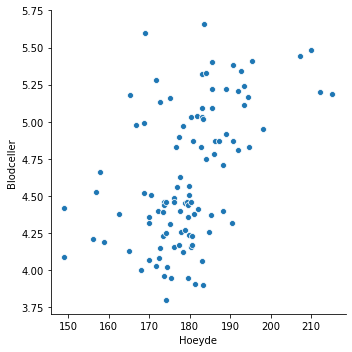

In [4]:
sns.relplot(x = 'Hoeyde', y = 'Blodceller', kind = 'scatter', data = df)
plt.show()

Vi skal tilpasse en enkel lineær modell med 'Blodceller' som respons og 'Hoeyde' som forklaringsvariabel. For å oppsummere det vi har snakket om i undervisningen, så består det å utføre en (enkel og multippel) lineær regresjonsanalyse av følgende steg:
    
* Steg 1: Bli kjent med dataaene ved å se på oppsummeringsmål og ulike typer plott
* Steg 2: Spesifiser en matematisk modell (med modellformel)
* Steg 3: Initialiser og tilpass modellen
* Steg 4: Presenter resultater fra den tilpassede modellen 
* Steg 5: Evaluer om modellen passer til dataene

Vi har nå gjort Steg 1, og under finner du kode for å gjøre steg 2-4. Studér og kjør koden.

In [5]:
# kodechunk Steg2-4

# Steg 2: spesifiser matematisk modell
formel='Blodceller ~ Hoeyde'

# Steg 3: Initaliser og tilpass en enkel lineær regresjonsmodell
# først initialisere
modell = smf.ols(formel,data=df)
# deretter tilpasse
resultat = modell.fit()

# Steg 4: Presenter resultater fra den tilpassede regresjonsmodellen
print(resultat.summary())

                            OLS Regression Results                            
Dep. Variable:             Blodceller   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     32.14
Date:                Tue, 20 Oct 2020   Prob (F-statistic):           1.32e-07
Time:                        03:17:38   Log-Likelihood:                -53.372
No. Observations:                 105   AIC:                             110.7
Df Residuals:                     103   BIC:                             116.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0669      0.630      1.692      0.0

Nå skal vi studere resultatene i *resultat.summary()*, og vi refererer til *øvre panel* som linjene mellom første og andre doble strek ==== (dette er delen som starter med Dep.Variable), *midtre panel*, og *nedre panel* (som starter med Omnibus). Vi ser først på **midtre** panel.

**Q1.1:** 

a) Skriv ned ligningen for den estimerte regresjonsmodellen. Forklar de ulike elementene.

b) Hvordan vil du tolke den estimerte verdien til skjæringpunktet (Intercept) $\hat{\beta}_0$? 


**Q1.2:** 

a) Vi ser at for 'Hoeyde' er 'coef' lik 0.0199. Hva er formelen som er brukt for å regne ut denne verdien? Hvordan vil du forklare dette tallet til en medstudent som ikke har hørt om enkel lineær regresjon? 

b) For 'Hoeyde' er det også gitt de to tallene 0.013 og 0.027 under kolonnene "[0.025      0.975]". Hva er disse to tallene og hvordan tolker du tallene? 

c) Videre står det for 'Hoeyde' at 'P>|t|' er 0.000. Hvilken hypotese har man testet her? Hva er konklusjonen fra hypotesetesten hvis vi bruker signifikansnivå 0.05? Hvordan henger dette sammen tallene 0.013 og 0.027 fra forrige punkt? 


Steg 5 gjenstår, og der skal vi evaluere om vi har en god modell, det har vi delvis allerede gjort. Når skal vi sjekke modellantagelsene i en enkel lineær regresjon, og det kan vi gjøre ved å lage residual-plott.

**Q1.3:** 

a) Hvilke modellantagelser gjør vi i en enkel lineær regresjon? 

b) Hva er en predikert verdi og hva er et residual (formler)? 

c) Hvordan kan vi bruke predikert verdi og residual til å sjekke modellantagelsene?

d) Vi får også oppgitt tallet "R-Squared" til å være 0.238 (ofte også skrevet som 23.8%). $R^2$ har i enkel lineær regresjon en sammenheng med korrelasjonskoeffienten, men det er en annen definisjon som er relatert til sum av kvadrerte residualer. Hvilken formel er det? Forklar alle symboler. Hvordan vil du forklare tallet til en medelev som ikke har hørt om enkel lineær regresjon? 

Vi har i undervisningen snakket om at det er to typer plott vi skal lage med utgangspunkt i residualene, og disse er kodet under.

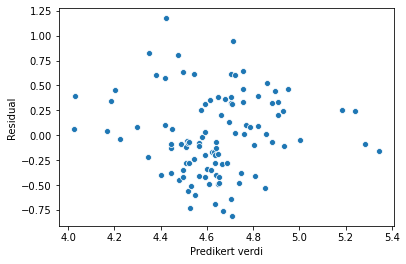

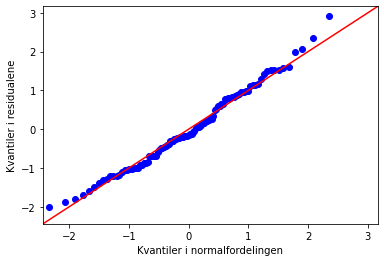

In [6]:
# kodechunk Steg5

# Steg 5: Evaluere om modellen passer til dataene
# Plotte predikert verdi mot residual 
sns.scatterplot(resultat.fittedvalues, resultat.resid)
plt.ylabel("Residual")
plt.xlabel("Predikert verdi")
plt.show()

# Lage kvantil-kvantil-plott for residualene
sm.qqplot(resultat.resid,line='45',fit=True)
plt.ylabel("Kvantiler i residualene")
plt.xlabel("Kvantiler i normalfordelingen")
plt.show()

**Q1.4:** 

a) Studer plottet av predikert verdi mot residual. Hvordan skal et slikt plott se ut hvis modellantagelsene er oppfylt? Hvordan vil du evaluere plottet? 

b) Studer QQ-plottet av residualene. Hvordan vil du evaluere plottet? 

c) Vil du konkludere med at modellen passer godt? 


## 1c) Multippel lineær regresjon 

Nå er det på tide å undersøke om det kan være lurt å ta med flere forklaringsvariabler inn i regresjonsanalysen vår.

Det er en rekke plott som nå vises. Vi ser kryssplott, tetthetsplott (som er en glattet versjon av histogram) og boksplott. For tetthetsplottene og boksplottene ser vi også at vi deler data inn i Kjoenn for å se om Kjoenn påviker effekten som Sport, Hoeyde og Vekt har på Blodceller.

**Q1.5:** 

Oppsummer kort hva du ser i plottene. Fokus skal være om du tror at det er noen sammenheng mellom Blodceller (som respons) og de fire mulige forklaringsvariablene (Hoeyde, Vekt, Kjoenn og Sport). 
Hvilket Kjoenn har generelt høyest verdi for Blodceller?

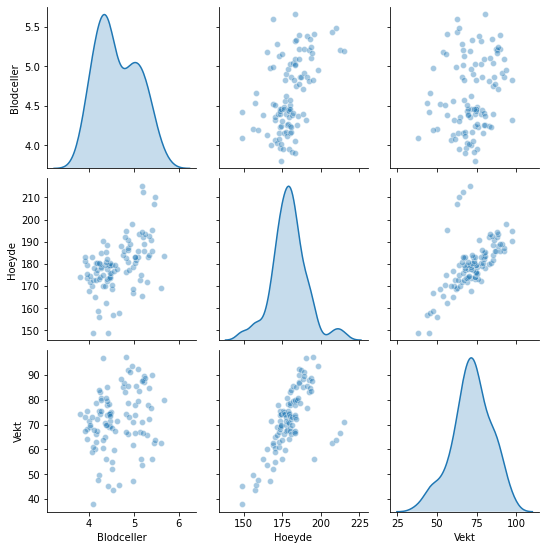

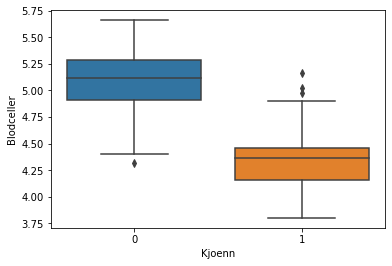

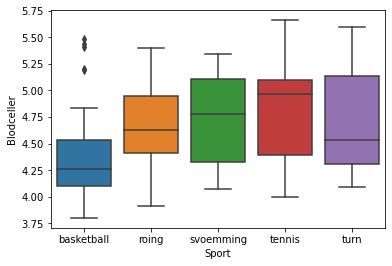

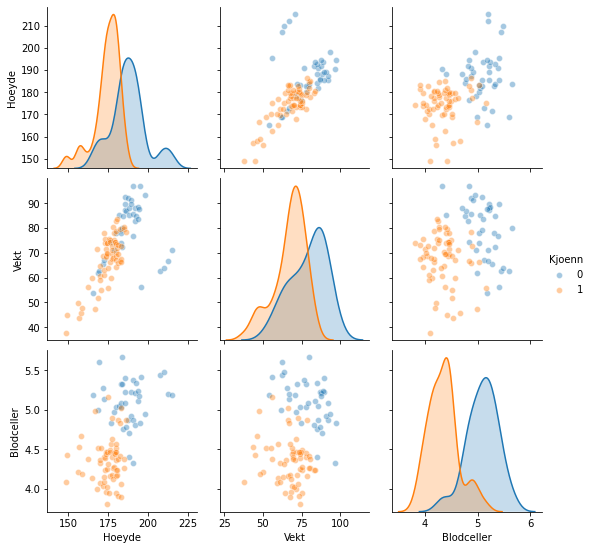

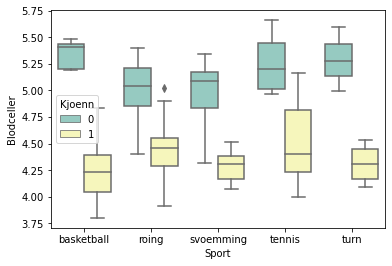

In [7]:
# Kryssplott av Hoeyde mot Blodceller, Vekt mot Blodceller og Hoeyde mot Vekt.
# På diagonalen er glattede histogrammer (tetthetsplott) av  Blodceller, Hoeyde og Vekt
sns.pairplot(df, vars = ['Blodceller','Hoeyde', 'Vekt'],
             diag_kind = 'kde',
             plot_kws=dict(alpha=0.4))
plt.show()

# Boksplott av Blodceller for hvert Kjoenn og for hver Sport

ax = sns.boxplot(x="Kjoenn", y="Blodceller", data=df)
plt.show()
ax = sns.boxplot(x="Sport", y="Blodceller", data=df)
plt.show()

sns.pairplot(df, vars = ['Hoeyde', 'Vekt', 'Blodceller'],
             hue = 'Kjoenn', 
             diag_kind = 'kde',
             plot_kws=dict(alpha=0.4))
plt.show()

ax = sns.boxplot(x="Sport", y="Blodceller", hue="Kjoenn",
                 data=df, palette="Set3")
plt.show()


Vi skal nå tilpasse en multippel lineær regresjon med Blodceller (som respons) og ta med alle de fire forklaringsvariablene. 

**Q1.6:** Med den nye modellformelen (som er gitt under) utfør regresjonen på nytt (ved å kopiere inn akkurat samme kode som i "kodechunk Steg2-4" for steg 3-4 og "kodechunk Steg5" for steg 5). 

a) Skriv ned ligningen for den estimerte regresjonsmodellen. Hvor mange regresjonsparametere er estimert? 

b) Sammenlign den estimerte regresjonskoeffisienten for 'Hoeyde' i denne modellen mot den estimerte regresjonskoeffisienten for 'Hoeyde' i den enkle lineære regresjonen. Har disse to samme fortolkning?

c) Hvis vi sammenligner en mann og en kvinne som begge er like høye, veier like mye og begge holder på med samme idrett, hva er gjennomsnittlig forskjell i antall blodceller mellom dem?

d) Hva er predikert antall blodceller for en mann som holder på med roing, er 180 cm høy og veier 75 kg? (Regn for hånd ved å putte inn tall fra resultat.summary().)


**Q1.7:**

a) Forklaringsvariablen 'Sport' er kategorisk og vi har brukt en såkalt dummy-variabelkoding, der 'Basketball' er referansekategorien. Er effekten av de andre sportskategoriene på 'Blodceller' signifikant forskjellig fra effekten for 'Basketball' (på nivå 0.05)?

b) Hva er andel forklart variasjon? Ville du forventet at andelen forklart variasjon gikk opp da vi la til flere forklaringsvariabler enn Hoeyde? Hvis vi nå la til en forklaringsvariabel som var IQ til idrettsutøveren, ville da $R^2$ økt?

c) Basert på utskrifter og plott. Vil du konkludere med at modelltilpasningen er god?

In [8]:
formel='Blodceller ~ Hoeyde + Vekt + Kjoenn + Sport'
# kopier inn akkurat samme kode som i "kodechunk Steg2-4" for steg 3-4 
# og "kodechunk Steg5"for steg 5

Helt til slutt lurer vi på å kutte ut Sport som forklaringsvariabel.

**Q1.8:** Utfør en ny multippel lineær regresjon (Steg 2-5) med 'Blodceller (som respons) og 'Kjoenn', 'Hoeyde' og 'Vekt' som forklaringsvariabler. Du må nå modifisere modellformelen ved å ta bort 'Sport', og så kopiere inn kode som du gjorde før Q1.6.

a) Hvor mange regresjonsparametere er nå estimert? Hva er signifikante forklaringsvariabler?

b) Er modelltilpasningen god? 

c) Sammenlign Adj. R-squared (også kalt justert-$R^2$) for modellen med og uten 'Sport'. Hvis vi skal avgjøre om 'Sport' skal være med som forklaringsvariabel ved å bruke Adj. R-squared, hva vil du da konkludere med? Begrunn valget ditt. 

# Oppgave 2: Klassifikasjon

Oppgave 2 har 6 spørsmålspunkter merket Q2.1-Q.2.6, som skal besvares.

**Oppgaven inneholder følgende elementer:**

* Laste inn og utforske et datasett for klassifikasjon
* Dele datasettet inn i treningssett, valideringssett og testsett
* Tilpasse en logistisk regresjon og diskutere denne
* Utføre $k$-nærmeste nabo-klassifikasjon, og evaluere godhet av klassifikasjonsresultatene

## Hvem vant tennismatchen?

En tennis-match spilles av to spillere. Datasettet vi skal se på er fra fire store tennisturneringer i 2013 (Australian Open, Wimbeldon, French Open og US Open) og oppgaven går ut på å tilpasse ulike metoder for å predikere hvilken spiller som vant en gitt match utifra data på antall dobbeltfeil, serve-ess og upressede feil. 

En dobbeltfeil er når en spiller ikke får slått en gyldig serve på sine to servemuligheter, et serve-ess er en serve der spilleren scorer poeng uten at motstanderen har vært nær ballen og en upresset feil ("unforced error") er at spilleren slår utenfor linjene eller i nettet på en "enkel" ball fra motstanderen. 
Det er kjent at en dyktig spiller vil ha mange serve-ess, og gjøre få dobbeltfeil og få upressede feil.

Mer informasjon om dataene: <https://archive.ics.uci.edu/ml/datasets/Tennis+Major+Tournament+Match+Statistics>.

In [9]:
# importere pakker og funksjoner vi trenger i oppgave 2
import numpy as np
import pandas as pd

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Fordelinger, modeller for regresjon, qq-plott 
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Trening og testsett, evaluering av klassifikasjonsmetoder 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

## 2a) Lese inn og preprosessere data

I datasettet vi skal jobbe med inneholder hver rad i datasettet informasjon om en match, der to spillere møtte hverandre. Datasettet har 42 kolonner og 943 rader, og kolonner som har navn som slutter med `.1` gjelder spiller 1 og `.2` gjelder spiller 2. Det er manglende observasjoner i datasettet.

En tennismatch kan ikke ende i uavgjort - en spiller må vinne. Resultatet av en match er dermed at:

* spiller 1 vinner- kodet som `1` (suksess for spiller 1)
* spiller 2 vinner - kodet som `0` (fiasko for spiller 1).

Dette er innholdet i kolonnen `Result`, som skal være hva vi vil predikere.

Vi skal ikke se på alle variablene i datasettet, og skal i tillegg til `Result` konsentrere oss om

* `DBF.1`, `DBF.2` og : antall dobbeltfeil for henholdsvis spiller 1 og 2
* `ACE.1`, `ACE.2`: antall serve-ess for henholdsvis spiller 1 og 2
* `UFE.1`,`UFE.2`: antall upressede feil for henholdsvis spiller 1 og 2

Istedenfor å se direkte på disse tre antallene for de to spillerne , skal vi for hver match lage 

* dobbeldiff= `DBF.1`-`DBF.2`
* acediff=`ACE.1`-`ACE.2`
* upressetdiff= `UFE.1`-`UFE.2`

og dette skal være våre eneste forklaringsvariabler for hver match.

*Oppsummert:* Observasjonsenheten i dataene er en match, vi har tre forklaringsvariabler dobbeldiff, acediff og upressetdiff, og y=`Result` (0 eller 1) er responsen vi ønsker å predikere.

Koden under leser inn dataene, lager de nye variablene, fjerner matcher med manglende verdier for minst en av variablene våre, gir kolonnen 'Result' navnet y, og putter alt inn i en pandas DataFrame. Etter det er gjort har vi en datasett med 787 rader (matcher) og fire kolonner.

In [10]:
# kodechunk inndata
df_in = pd.read_csv("https://www.math.ntnu.no/emner/IST100x/ISTx1003/tennis.csv", sep=",")
df=pd.concat([df_in['Result'],
              df_in['DBF.1']-df_in['DBF.2'], 
              df_in['ACE.1']-df_in['ACE.2'],
              df_in['UFE.1']-df_in['UFE.2']],axis=1)
df.columns=['y','dobbeldiff','acediff','upressetdiff']
df.dropna(inplace=True)
print(df.describe())

                y  dobbeldiff     acediff  upressetdiff
count  787.000000  787.000000  787.000000    787.000000
mean     0.501906   -0.205845    0.310038     -0.472681
std      0.500314    3.384716    6.137976     14.557780
min      0.000000  -14.000000  -25.000000    -58.000000
25%      0.000000   -2.000000   -3.000000    -10.000000
50%      1.000000    0.000000    0.000000      1.000000
75%      1.000000    2.000000    3.000000      9.000000
max      1.000000   14.000000   28.000000     38.000000


Videre vil vi dele datasettet vårt inn i tre datasett: et treningssett, et valideringssett og et testsett. 

Dette gjør vi i to omganger ved funksjonen `train_test_split` fra underpakken `sklearn.model_selection` i pakken scikit-learn. Først deler vi data inn i 80% trening/validering og 20% test, og deretter deler vi trening/valideringssettet inn i 75% trening og 25% validering.

In [11]:
# kodechunk trenvaltest
df_trenval, df_test = train_test_split(df, test_size = 0.2,random_state=1,stratify=df['y'])
df_tren, df_val = train_test_split(df_trenval, test_size = 0.25,random_state=1,stratify=df_trenval['y'])
print("tren: ", df_tren.shape)
print(df_tren.describe())
print("val: ",df_val.shape)
print(df_val.describe())
print("test: ",df_test.shape)
print(df_test.describe())
print(df_tren["y"].value_counts())
print(df_val["y"].value_counts())
print(df_test["y"].value_counts())

tren:  (471, 4)
                y  dobbeldiff     acediff  upressetdiff
count  471.000000  471.000000  471.000000    471.000000
mean     0.503185   -0.127389    0.282378     -0.662420
std      0.500521    3.408486    6.085113     14.278784
min      0.000000  -14.000000  -21.000000    -44.000000
25%      0.000000   -2.000000   -3.000000     -9.500000
50%      1.000000    0.000000    0.000000      0.000000
75%      1.000000    2.000000    3.000000      9.000000
max      1.000000   14.000000   22.000000     36.000000
val:  (158, 4)
               y  dobbeldiff     acediff  upressetdiff
count  158.00000  158.000000  158.000000    158.000000
mean     0.50000   -0.018987    0.202532     -1.044304
std      0.50159    3.193288    6.044168     14.622792
min      0.00000   -9.000000  -24.000000    -39.000000
25%      0.00000   -2.000000   -3.000000    -10.750000
50%      0.50000    0.500000    0.000000      1.000000
75%      1.00000    2.000000    3.000000      8.000000
max      1.00000    8.000

**Q2.1:** I denne oppgaven skal vi etterhvert tilpasse logistisk regresjon og $k$-nærmeste nabo-klassifikasjon. 
    
a) Hvorfor ønsker vi å dele dataene inn i trening, validering og test-sett? 

b) Hva brukes hver av disse delene til i våre analyser? 

c) Hvor stor andel av dataene er nå i hver av de tre settene? Ser de tre datasettene ut til å ha lik fordeling for de tre forklaringsvariablene og responsen?

For å utforske dataene lager vi kryssplott av de tre forklaringsvariablene for treningsdataene og fargelegger punktene fra matchene med hvem som vant matchen. På diagonalen ser vi empiriske tetthetsplott (glattet variant av et histogram). Vi har også regnet ut empirisk korrelasjonskoeffisient for alle par av variabler.

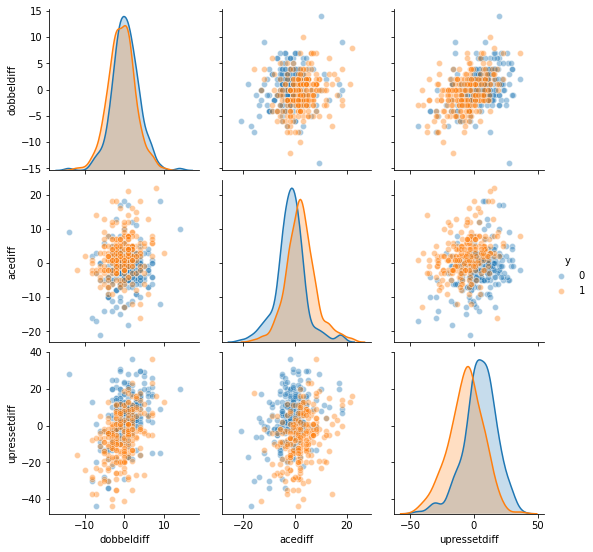

,y,dobbeldiff,acediff,upressetdiff
y,1.000000,-0.150667,0.321396,-0.384639
dobbeldiff,-0.150667,1.000000,0.089138,0.421923
acediff,0.321396,0.089138,1.000000,0.160836
upressetdiff,-0.384639,0.421923,0.160836,1.000000


In [12]:
# kodechunk utforskplott

sns.pairplot(df_tren, vars = ['dobbeldiff','acediff','upressetdiff'],
             hue = 'y', 
             diag_kind = 'kde',
             plot_kws=dict(alpha=0.4))
plt.show()

corr = df_tren.corr()
display(corr.style.background_gradient(cmap='coolwarm', axis=None))
plt.show()

**Q2.2:** 

a) Kommenter hva du ser i plottene og utskriften. 

b) Hvilke av de tre variablene tror du vil være gode til å bruke til å predikere hvem som vant matchen? Begrunn svaret.

## 2b) Logistisk regresjon

Vi tilpasser en logistisk regresjon til treningssettet, og regner ut feilrate for valideringssettet gitt at vi klassifiserer som suksess (spiller 1 vinner) når sannsynligheten for å vinne er anslått til minst 0.5.

Dette gjør med de samme stegene som det vi gjorde for multippel lineær regresjon:

* Steg 1: Bli kjent med dataaene ved å se på oppsummeringsmål og ulike typer plott
* Steg 2: Spesifiser en matematisk modell (med modellformel)
* Steg 3: Initialiser og tilpass modellen
* Steg 4: Presenter resultater fra den tilpassede modellen 
* Steg 5: Evaluere om modellen passer til dataene

Vi er ferdig med Steg 1, og gjør så Steg 2-4 under.

In [13]:
# kodechunk logistiskregresjon

# Steg 2: Modellformel
formel="y ~ acediff+dobbeldiff+upressetdiff"

# Steg 3: Initialiser modellen 
modell = smf.logit(formel, data = df_tren)

# Tilpass modellen
resultat = modell.fit()

# Steg 4: Presenter resultater fra den tilpassede modellen 
print(resultat.summary())

# Tolkning av estimerte regresjonsparametere er på exp-skala (odds)
print("FLERE utregninger:")
print("exp(beta): ",np.exp(resultat.params))

# Spesifiser verdi for cutoff
cutoff = 0.5

# Prediker verdi for valideringssettet
val_pred = resultat.predict(exog = df_val)

# klassifiser som seier for spiller 1 hvis sannsynligheten for at spiller 1 vant er over 0.5
y_valpred = np.where(val_pred > cutoff, 1, 0)
y_valobs = df_val['y']

# Finn andel korrekte klassifikasjoner
print("Feilrate:", 1-accuracy_score(y_true=y_valobs, y_pred=y_valpred))

Optimization terminated successfully.
         Current function value: 0.515312
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  471
Model:                          Logit   Df Residuals:                      467
Method:                           MLE   Df Model:                            3
Date:                Tue, 20 Oct 2020   Pseudo R-squ.:                  0.2565
Time:                        03:17:44   Log-Likelihood:                -242.71
converged:                       True   LL-Null:                       -326.46
Covariance Type:            nonrobust   LLR p-value:                 4.406e-36
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0732      0.111     -0.657      0.511      -0.292       0.145
acediff          0.1895

**Q2.3:** 

a) Hvilke forklaringsvariabler er signifikante i modellen på signifikansnivå 0.05? 

b) Hvordan kan du tolke verdien av exp(upressetdiff)? 

c) Hva angir feilraten til modellen? Hvilket datasett er feilraten regnet ut fra? Er du fornøyd med verdien til feilraten?

**Q2.4:** Tilpass nå den logistiske regresjonen uten dobbeldiff som forklaringsvariabel - ved å kopiere inn koden fra kodechunk "logistiskregresjon" (men ikke den gamle formelen). 

a) Diskuter hva du ser. 

b) Som din beste modell for logistisk regresjon vil du velge modellen med eller uten dobbeldiff som kovariat? Begrunn svaret.


In [14]:
# kodechunk logistiskmodellformel

# Steg 2: Modellformel
formel="y ~ acediff+upressetdiff"

# Kopier inn Steg 3-4 fra koden over.

## 2c) $k$-nærmeste-nabo-klassifikasjon

Vi skal nå kun se på forklaringsvariablene acediff og upressetdiff, og tilpasse $k$-nærmeste-nabo-metoden der vi bruker euklidsk avstand som avstandsmål.
Vi bruker valideringssettet til å velge $k$.

Koden under tilpasse $k$-nærmeste nabo-klassifikasjon for ulike verdier for $k$, deretter regnes feilrate ut på treningssettet og valideringssettet og plottes.


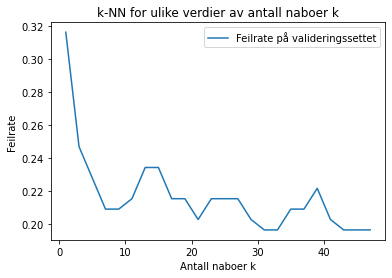

Valideringsfeilrate:
[[ 1.          0.3164557 ]
 [ 3.          0.24683544]
 [ 5.          0.2278481 ]
 [ 7.          0.20886076]
 [ 9.          0.20886076]
 [11.          0.21518987]
 [13.          0.23417722]
 [15.          0.23417722]
 [17.          0.21518987]
 [19.          0.21518987]
 [21.          0.20253165]
 [23.          0.21518987]
 [25.          0.21518987]
 [27.          0.21518987]
 [29.          0.20253165]
 [31.          0.19620253]
 [33.          0.19620253]
 [35.          0.20886076]
 [37.          0.20886076]
 [39.          0.22151899]
 [41.          0.20253165]
 [43.          0.19620253]
 [45.          0.19620253]
 [47.          0.19620253]]
31


In [15]:
# kodechunk knn

knaboer = np.arange(1,49,step=2)
val_feilrate = np.empty(len(knaboer))

X_tren=df_tren[['acediff','upressetdiff']] #bruker bare disse to forklaringsvariablene
X_val=df_val[['acediff','upressetdiff']] 

for i,k in enumerate(knaboer):
    
#Initialiser kNN med  k neighbors
    knn = KNeighborsClassifier(n_neighbors=k,p=2) # p=2 gir euklidsk avstand

# Tilpass modellen med treningssettet
    knn.fit(X_tren, df_tren['y'])
    
# Beregn feilrate på valideringssett
# score er accuracy= "andel korrekt"
    val_feilrate[i] = 1-knn.score(X_val, df_val['y'])
    
# Lage plott
plt.title('k-NN for ulike verdier av antall naboer k')
plt.plot(knaboer, val_feilrate, label='Feilrate på valideringssettet')
plt.legend()
plt.xlabel('Antall naboer k')
plt.ylabel('Feilrate')
plt.show()

valres=np.vstack((knaboer, val_feilrate))
print("Valideringsfeilrate:")
print(valres.T)

mink_valfeilrate = knaboer[np.where(val_feilrate == val_feilrate.min())]
print(mink_valfeilrate[0])

**Q2.5:** Forklar kort hva som er gjort i koden over, og hvilken verdi av $k$ du vil velge.

## 2d) Evaluere beste modeller

Nå tar vi frem testsettet og sammenligner den beste modellen for logistisk regresjon med den beste for $k$-nærmeste-nabo-klassifikasjon. 

**Q2.6:** Gjør nødvendige endringer i koden under (kodechunk bestemodellertest). 

a) Vil du foretrekke å bruke logistisk regresjon eller $k$-nærmeste-nabo-klassifikasjon på tennisdataene?

b) Oppsummer hva du har lært at kan være en god metode for å predikere hvem som vinner en tennismatch.


In [16]:
# kodechunk bestemodellertest

# beste resultat for logistisk regresjon
bestelogist=resultat #hva er navnet på resultatobjektet fra den logistiske regresjon du valgte? var det den med eller uten dobbeldiff?
test_pred = resultat.predict(exog = df_test)
y_testpred = np.where(test_pred > cutoff, 1, 0)
y_testobs = df_test['y']
print("Feilrate logistisk regresjon:", 1-accuracy_score(y_true=y_testobs, y_pred=y_testpred))

# beste resultat for kNN
bestek=3 # hva er din beste k?
knn = KNeighborsClassifier(n_neighbors=bestek,p=2)
knn.fit(X_tren, df_tren['y'])
X_test=df_test[['acediff','upressetdiff']]
print("Feilrate kNN:", 1-knn.score(X_test, df_test['y']))

Feilrate logistisk regresjon: 0.19620253164556967
Feilrate kNN: 0.30379746835443033


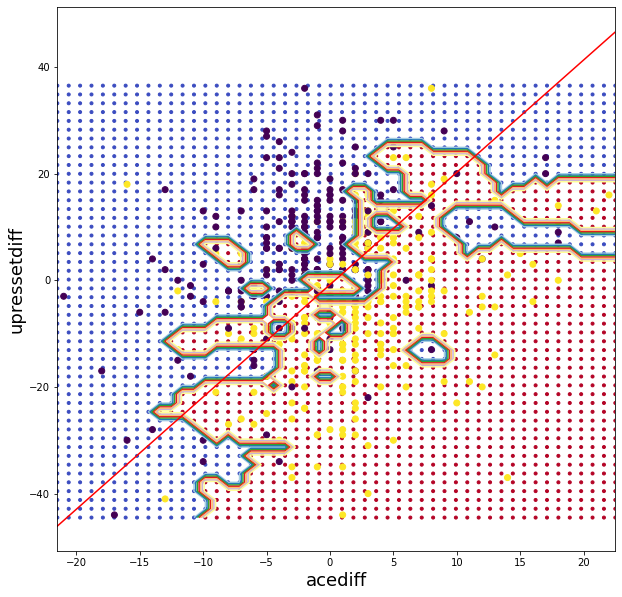

In [17]:
# BONUS - plotting av klassegrensene for de beste modellene!

X=X_tren
n = 50  # steglengde
# lage et grid for å plotte
x_min, x_max = X['acediff'].min() - 0.5, X['acediff'].max() + 0.5
y_min, y_max = X['upressetdiff'].min() - 0.5, X['upressetdiff'].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, n),
                     np.linspace(y_min, y_max, n))
# Plotter nå klassegrensen, ved å predikere klassen til hver observasjon i griddet vi laget.
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
 
# Put the result into a color plot
Z = Z.reshape(xx.shape)
fig, ax = plt.subplots(figsize = (10,10))
ax.contour(xx, yy, Z, cmap=plt.cm.Paired)
ax.scatter(xx, yy, c=Z, marker=".",cmap=plt.cm.coolwarm)
ax.set_xlabel('acediff', fontsize=18)
ax.set_ylabel('upressetdiff', fontsize=18)
#fig.show()

# legger til klassegrensen for logistisk regresjon - dette blir bare riktig hvis du 
# har valgt modellen med acediff og upressetdiff som den beste modellen

beta0=resultat.params[0]
beta1=resultat.params['acediff']
beta2=resultat.params['upressetdiff']
x = np.linspace(x_min, x_max, n)
y=-beta0/beta2-x*beta1/beta2
plt.plot(x, y, '-r', label='logistisk klassegrense')
plt.scatter(X_tren['acediff'],X_tren['upressetdiff'],c=df_tren['y'])

# Oppgave 3: Klyngeanalyse

Oppgave 3 har 6 spørsmålspunkter merket Q3.1-Q.3.6, som skal besvares.

**Oppgaven inneholder følgende elementer:**
* Laste inn og utforske et bilde, gjøre bildet om til et datasett for bruk i klyngeanalyse
* Bruke $K$-gjennomsnitt-klyngeanalyse til å lage klynger av piksler i et bilde
* Vise resultater fra klyngeanalysen - som bilde - og tolke resultatene
* Diskutere $K$-gjennomsnitt-klyngeanalyse vs. hierarkisk klynganalyse
* Utvide til flere klynger i $K$-gjennomsnitt-klyngeanalyse

## Hvorfor klyngeanalyse på et fargebilde?

I denne oppgaven skal vi bruke klyngeanalysealgoritmer for å analysere et bilde. En slik klyngeanalyse kan være det første vi gjør hvis vi ønsker å identifisere og skille ut ulike segmenter, som for eksempel forgrunn og bakgrunn, i et bilde. Det vil si, klyngeanalysen hjelper oss til å fjerne unødvendige detaljer og støy, og resultatet kan være et utgangspunkt for mer avanserte algoritmer, hvor vi i tillegg ønsker å identifisere akkurat hva som kan sees i bildet.

I oppgaven legger vi vekt på de statistiske metodene vi bruker og ikke så mye på bildebehandling og programmering generelt. Men vi må se litt på hvordan dataene i et bilde er organisert. 

Etter at vi har lastet bildet inn i Python vil det være lagret i en tabell hvor vi har 3 tall som beskriver fargen på hver piksel i bildet. Tallene er 8-bit heltall, et for hver av fargene rød (R), grønn (G) og blå (B). Tallene beskriver lysstyrke for fargene, og er $0$ for en farge hvis fargen er helt fraværende, og $255$ hvis fargen lyser med full styrke. Noe av det første vi kommer til å gjøre er å konvertere disse heltallene til flyttall som vi da kan utføre beregninger på.

RGB-modellen for farger er på ingen måte den eneste, og er litt fjernt fra hvordan vi som mennesker opplever farger, men vi holder oss til denne for å gjøre fremstillingen så enkel som mulig.


In [18]:
# importere pakker og funksjoner vi trenger i oppgave 3
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg # hvis du skal lese eget bilde

from sklearn.datasets import load_sample_image # lese inn bilder fra denne modulen
from sklearn.cluster import KMeans # k-gjennomsnitt klyngeanalyse

## 3a) Lese inn og preprosessere bildet

Vi skal starte med å gjøre følgende:

* Laste inn et bilde
* Plotte bildet
* Reskaler bilde til intervallet $[0, 1]$.
* Endre dimensjonen på bildet til $n$ pixler (observasjoner) og $p$ farger (variabler), som skal være vår datamatrise.

Her bruker vi et bilde som heter *china.jpg* fra en Datasett-modul fra pakken scikit-learn, men du kan laste opp ditt eget bilde (av type *.jpg* eller *.png*) og heller bruke det. Bildet du bruker vil bli en offisiell del av din eksamensbesvarelse, så pass på at det er greit å bruke bildet til dette formålet.

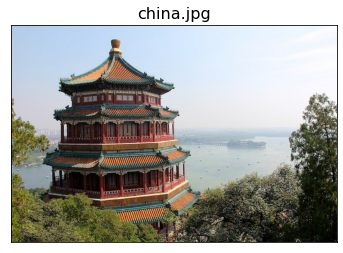

In [19]:
# kodechunk lasteinnbilde

# Vi laster inn bildet china.jpg
# Du kan endre filnavn hvis du vil ha ditt eget bilde
filnavn = 'china.jpg'
bilde = load_sample_image(filnavn)

# Vi lager en enkel funksjon som viser bilder på skjermen
def vis_bilde(bilde, bildetekst):
    ax = plt.axes(xticks=[], yticks=[])
    ax.set_title(bildetekst, size=16)
    ax.imshow(bilde);
    plt.show()
                 
vis_bilde(bilde,filnavn)     

Vi kjører koden under for å se litt på hva slags data det er vi har lastet inn. Vi ser at bildet ligger lagret som en todimensjonal tabell, og hvert element beskriver fargen til en pixel ved tre tall, et tall for hver av fargene rød (R), grønn (G) og blå (B).

Alle fargene vi kan vise på skjermen er en blanding av rødt, blått og grønt lys. Tallene i tabellen er lagret som et $8$-bit tall, mellom $0$ og $255$, hvor $0$ betyr at en farge er slått av, og $255$ betyr at fargen lyser med full styrke. 

In [20]:
#kodechunk blikjent

# hvilken type er bildet vårt
print("Bildet har type", type(bilde))

# bildet er en numpytabell. Hva er formatet?
print("Formatet til tabellen er", bilde.shape)

# vi ser på pixel i posisjon (20,10) i bildet
print("Pixel (10,20) har verdi [R,G,B] =", bilde[10,20])
print("En farge har type", type(bilde[10,20,0]))

# Vi henter ut informasjonen om formatet for bruk senere
bilde_rader, bilde_kolonner, ant_farger = bilde.shape
bilde_piksler = bilde_rader * bilde_kolonner

print("Antall rader i bildet er", bilde_rader)  
print("Antall kolonner i bildet er", bilde_kolonner)
print("Antall piksler i bildet er", bilde_piksler)
print("Antall fargeverdier per pixel er", ant_farger)

Bildet har type <class 'numpy.ndarray'>
Formatet til tabellen er (427, 640, 3)
Pixel (10,20) har verdi [R,G,B] = [179 204 234]
En farge har type <class 'numpy.uint8'>
Antall rader i bildet er 427
Antall kolonner i bildet er 640
Antall piksler i bildet er 273280
Antall fargeverdier per pixel er 3


Vi konverterer fargedatene til flyttall, og velger samtidig å skalere dataene slik at fargeverdiene ligger mellom $0.0$ og $1.0$, hvor $1.0$ betyr lys med full styrke. 

Funksjonen 'kmeans' som vi skal bruke i denne oppgaven krever et annet format på dataene, så vi legger alle pixlene etter hverandre i en lang kolonne, med for hver rad (piksel) har vi tre fargeverdier mellom 0.0 og 1.0. 


In [21]:
# kodechunk endreformatbilde

# Skalar bildet til flyttal mellom 0.0 og 1.0
data_farger = bilde / 255

# Vi endrer formatet på dataene til (antall piksler, antall farger)
data_farger = data_farger.reshape(bilde_rader * bilde_kolonner, ant_farger)

# Vi ser på formatet til datene
print("Det nye formatet for dataene er", data_farger.shape)
print("Typen til en farge er nå",type(data_farger[10,0]))

Det nye formatet for dataene er (273280, 3)
Typen til en farge er nå <class 'numpy.float64'>


**Q3.1:** Vi tenker på 'data_farger' som en tabell hvor hver piksel er en observasjon og hver fargeverdi er en variabel. 

a) Hvor mange observasjoner (n) og hvor mange variabler (p) har vi? 

b) Hvor finner du fargeverdiene til observasjonen med posisjon $(x,y)=(10,20)$ i bildet i den nye tabellen "data_farger"? 
Hint: når reshape brukes legges pikslene radvis etter hverandre.

## 3b) Kryssplott

Koden under er en ikke-komplett kode for å lage kryssplott av alle kombinasjoner av variablene, det vil si rød mot grønn, rød mot blå og blå mot grønn. Bildet er stort, så vi velger ut et redusert datasett med $N=10000$ datapunkter som vi da plotter.

**Q3.2:** Se kode under for hvordan lage et redusert datasett, og plotte rød mot grønn. Du legger til plott av rød mot blå og blå mot grønn. Kommenter hva du ser.

Legg merke til at vi har brukt *farger* i koden under som *color* i kryssplottet (scatter).

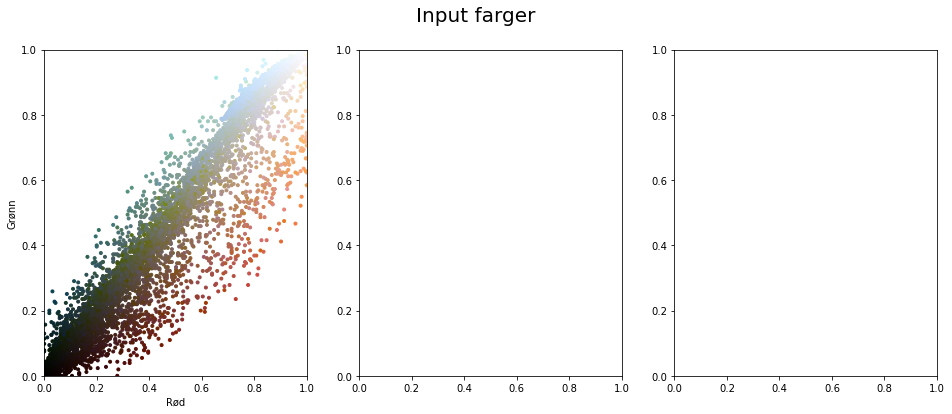

In [22]:
# kodechunk kryssplott

# Størrelse datasett
utvalg_storrelse = 10000

# Initialiser en generator for pseudo-tilfeldige tall
rnd_gen = np.random.RandomState(0)

# Trekk tilfeldige indekser fra hele bildet
indekser = rnd_gen.permutation(bilde_piksler)[:utvalg_storrelse]

# Finn de fargeverdiene og del dem opp i tre ulike vektorer
utvalg_farger = data_farger[indekser]
R, G, B = utvalg_farger.T

fig, ax = plt.subplots(1, 3, figsize=(16, 6))

# Plott rød mot grønn
ax[0].scatter(R, G, color=utvalg_farger, marker='.')
ax[0].set(xlabel='Rød', ylabel='Grønn', xlim=(0, 1), ylim=(0, 1))

# Plot rød mot blå
# Implementer selv

# Plot blå mot grønn
# Implementer selv

fig.suptitle('Input farger', size=20);
plt.show()

## 3c) Klyngeanalyse med $K$-gjennomsnitt
Vi utfører klyngeanalysen i tre steg, i koden under.

1. Angi antall klynger du ønsker
2. Initialiser $K$-gjennomsnitt-modellen
3. Tilpass $K$-gjennomsnitt-modellen

Fargene som representer sentroidene i analysen ligger nå lagret i tabellen 'kmeans.cluster_centers_'.

Gitt et datapunkt så kan vi finne ut hvilken klynge punktet tilhører ved hjelp av
funksjonen 'kmeans.predict()'. Funksjonen returnerer indekser for tabellen 'kmeans.cluster_centers_'.

Merk at funksjonen tar en tabell som input, så for å sjekke en farge, f.eks. '[0.1,1.0,0.1]' så skriver du 'kmeans.predict([[0.1,1.0,0.1]])'. 

Til info: i RBG-systemet kodes svart som [0.0,0.0,0.0], hvit som [1.0,1.0,1.0], rød som [1.0,0.0,0.0], grønn som [0.0,1.0,0.0], blå som [0.0,0.0,1.0] og til slutt gul som [1.0,1.0,0.0].

Hint: her kan du lese litt mer om KMeans-funksjonen: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

**Q3.3:** 

a) Hva er sentroidene for ditt bilde?

b) I hvilken klynge havner fargene svart, hvit, rød, grønn, blå og gul?

* Lag et datasett 'data_klynger' som inneholder klyngenummeret til hver pixel i bildet.
* Lag et datasett 'data_sentroider' som inneholder fargen til sentroiden som ligger nærmest hver pixel i bildet.
* Gjenta koden over for kryssplottene, men farg nå hver piksel med verdien til sentroiden for klyngen pikselen hører til.

c) Diskuter kort hva du ser.

d) Ved å se på det opprinnelige bildet, er det mulig å se hvilke deler av bildet som hører til hvilken klynge? Forklar!


In [ ]:
# kodechunk kmeans

# Vi utfører klyngeanalysen
#
# Steg 1: Spesifiser antall klynger
antall_klynger = 2

# Steg 2: Initaliser k-means algoritmen
kmeans = KMeans(n_clusters = antall_klynger) 

# Steg 3: Tilpass modellen
kmeans.fit(data_farger)

# sentroidene (a)
sentroider = kmeans.cluster_centers_
print("De 2 sentroidene med 2 klynger er", sentroider)

# klynge for svart, hvit, rød, grønn, blå og gul? (b) 

# Finn hvilken klynge hver pixel tilhører 

# Finn sentroiden som ligger nærmest hver pixel

# Finn de nye fargene for pixler 

# Samme plot som over, men nå med nye farger
fig, ax = plt.subplots(1, 3, figsize=(16, 6))
ax[0].scatter(R, G, color=nye_farger, marker='.')
ax[0].set(xlabel='Rød', ylabel='Grønn', xlim=(0, 1), ylim=(0, 1))

# inn med de to andre kombinasjonene

fig.suptitle('Input farger', size=20);
plt.show()


Du skal nå plotte pikslene med klyngetilhørighet i riktig posisjon på bildet. 
**Gitt at du har laget 'data_sentroider' i punktet over**, vil all kode under fungere. Ved å kjøre koden gjør du følgende:

* Plott først bildet ved hjelp av datasettet 'data_farger' for å forsikre deg om at du endrer tilbake riktig format. Du skal ha samme bilde som når vi plottet helt i starten av oppgaven. Merk at formatet på datene må endres med 'reshape' tilbake til formatet 'bilde.shape'. 
* Plott så bilder hvor du bruker datasettet 'data_sentroider' du laget i forrige punkt.
* Lag et nytt datasett 'data_svhv' hvor du gir piksler i den ene klyngen hvit farge og piksler i den andre klyngen svart farge. Plot også bildet med 'data_svhv'
* Lag et nytt datasett 'data_klynge_0' hvor pikslene har samme farge som i det opprinnelige bildet, hvis de tilhører klynge 0, men hvor piksler i klynge 1 blir satt til hvit. 
* Lag også et datasett 'data_klynge_1' hvor pikslene beholder sin farge hvis de hører til klynge 1, men er hvite ellers. Plot begge datasettene 'data_klynge_0' og 'data_klynge_1'

**Q3.4:** Kommenter og forklar hva du observerer.

In [ ]:
vis_bilde(data_farger.reshape(bilde.shape), "Opprinnelig bilde")
vis_bilde(data_sentroider.reshape(bilde.shape), "Bilde etter 2-gjennomsnitt klyngeanalyse")

def svarthvitt(klynge):
    if klynge == 1:
        return [1.0,1.0,1.0]
    else: 
        return [0.0,0.0,0.0] 
    
data_svhv = np.array([svarthvitt(klynge) for klynge in data_klynge])
vis_bilde(data_svhv.reshape(bilde.shape), "Bilde i svart/hvitt")

def turn_on_i(i, klynge, farge):
    if klynge == i: 
        return farge
    else: 
        return [1.0,1.0,1.0]
    
data_klynge_0 = np.array([turn_on_i(1, klynge, farge) for (klynge, farge) in zip(data_klynge, data_farger)])
vis_bilde(data_klynge_0.reshape(bilde.shape), "klynge 1 slått av")

data_klynge_1 = np.array([turn_on_i(0, klynge, farge) for (klynge, farge) in zip(data_klynge, data_farger)])
vis_bilde(data_klynge_1.reshape(bilde.shape), "klynge 0 slått av")

## 3d) Hierarkisk klyngeanalyse

**Q3.5** Hva er hovedforskjellene mellom $K$-gjennomsnitt-klyngeanalyse og hierarkisk klyngeanalyse? Vi ber deg ikke om å finne klynger i bildet ved hjelp av hierarkisk klyngeanalyse. Hva kan være grunnen til at vi ikke gjør det?

## 3e) Flere gråtoner?

I det opprinnelige bildet 'china.jpg' brukes 24bit, det vil si vi hadde over 16 millioner ulike farger for hver piksel. Vi reduserte dette til to klynger, eller 1 bit per piksel, og produserte et bilde med to farger. Ihvertfall i bildet 'china.jpg' så kan vi kjenne igjen mange av detaljene i det opprinnelige bildet, men mye av informasjonen er gått tapt. 

**Q3.6**: Hvor mange klynger trenger du for at du synes at bildet ser omtrent ut som det opprinnelige bildet? Prøv ut med ulike antall klynger og finn et klyngeantall du synes gir en god tilnærmelse, både med tanke på farger og detaljer.
Hvor mange bit blir brukt per piksel i ditt valg av antall klynger over?

Merk! Unngå å velge med alt for mange klynger (16 er et ganske høyt tall), da algoritmen vil bruke lang tid på å bli ferdig.


In [ ]:
# Steg 1: Spesifiser antall klynger
antall_klynger = 2

# Steg 2: Initaliser k-means algoritmen
kmeans = KMeans(n_clusters = antall_klynger) 

# Steg 3: Tilpass modellen
kmeans.fit(data_farger)

# Finn sentroidene - fra Q3.3a)
sentroider = kmeans.cluster_centers_
print("De sentroidene er", sentroider)

# Finn hvilken klynge hver pixel tilhører : Legg inn koden du fant i Q3.3

# Finn hvilken sentroide som er nærmest hver klynge: Legg inn koden du fant i Q3.3

# plott det nye bildet
vis_bilde(data_sentroider.reshape(bilde.shape), "bilde med "+str(antall_klynger)+" klynger")

# sammen med det opprinnelige bildet
vis_bilde(data_farger.reshape(bilde.shape), "Opprinnelig bilde")